# Task H

In [6]:
!pip install -q librosa soundfile

In [7]:
import os, glob, numpy as np, matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import librosa
import soundfile as sf

Accomplish the following. Using the audio signal provided in [1],

In [8]:
candidates = [
    '/mnt/data',
    '/content',
    './My_Voice',
    './'
]

In [9]:
DATA_DIR = next((p for p in candidates if os.path.isdir(p) and len(glob.glob(os.path.join(p,'*.wav')))>0), None)
print('Auto-detected DATA_DIR =', DATA_DIR)

Auto-detected DATA_DIR = ./My_Voice


In [10]:
wav_list = sorted(glob.glob(os.path.join(DATA_DIR, '*.wav')))
print('Found', len(wav_list), 'wav files:')
for p in wav_list:
    print(' -', os.path.basename(p))

Found 4 wav files:
 - Phoneme_1.wav
 - Phoneme_2.wav
 - Phoneme_3.wav
 - Phoneme_4.wav


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
for wav_file in wav_list:
    y, sr = librosa.load(wav_file, sr=None)
    # Scale amplitude to be between -1 and 1
    scaled_y = y / np.max(np.abs(y))

    wavfile.write(wav_file, sr, scaled_y)

    print(f"Scaled amplitude for {os.path.basename(wav_file)}")

Scaled amplitude for Phoneme_1.wav
Scaled amplitude for Phoneme_2.wav
Scaled amplitude for Phoneme_3.wav
Scaled amplitude for Phoneme_4.wav


In [13]:
audio_data = []
sampling_rates = []

for wav_file in wav_list:
    y, sr = librosa.load(wav_file, sr=None)
    audio_data.append(y)
    sampling_rates.append(sr)
    print(f"Loaded {os.path.basename(wav_file)}: y shape = {y.shape}, sr = {sr}")


print("Loaded audio data and sampling rates for all files.")

Loaded Phoneme_1.wav: y shape = (32136,), sr = 16000
Loaded Phoneme_2.wav: y shape = (31951,), sr = 16000
Loaded Phoneme_3.wav: y shape = (32136,), sr = 16000
Loaded Phoneme_4.wav: y shape = (32136,), sr = 16000
Loaded audio data and sampling rates for all files.


 Compute and plot the spectrogram with the following setup.
 Make sure the magnitude spectrum is in dB scale, make the color bar go from 0 dB to- 60 dB, also plot the colorbar on the
 extreme right.

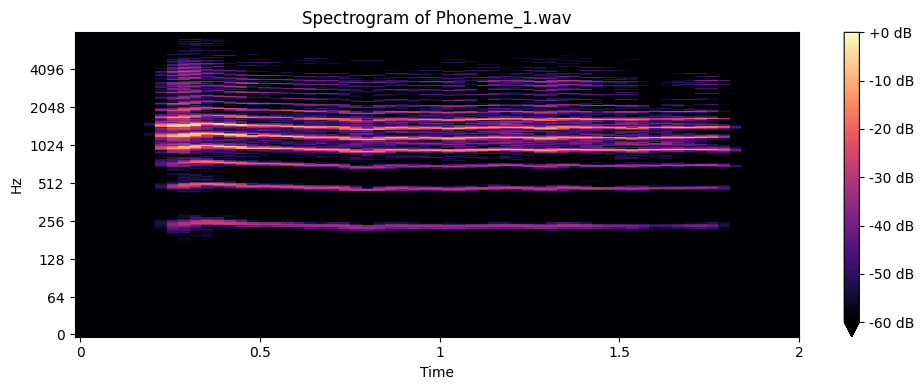

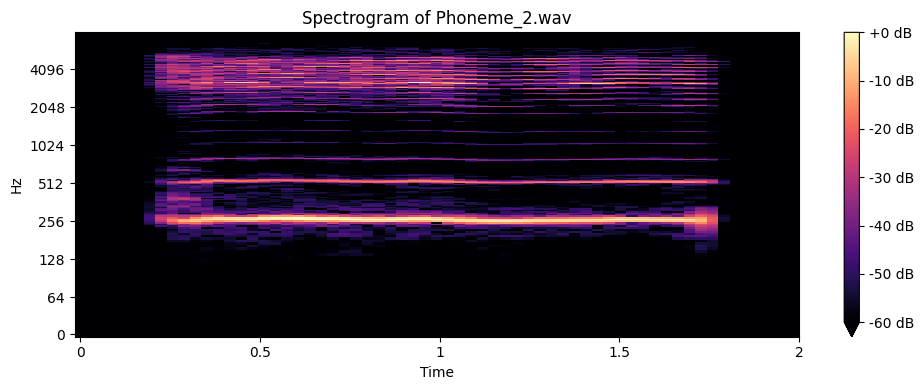

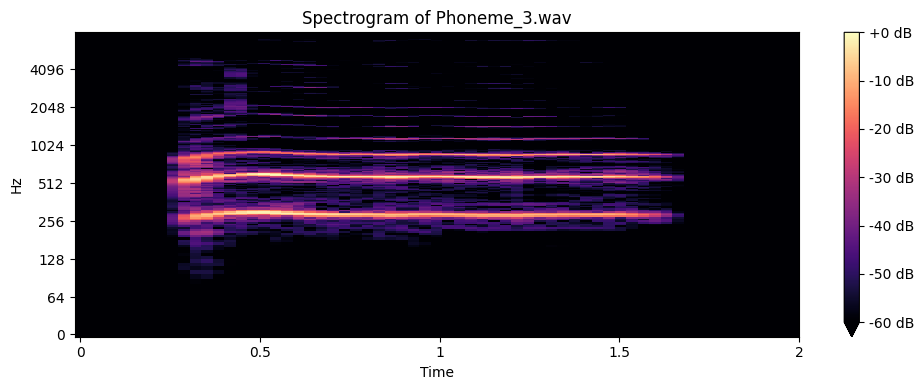

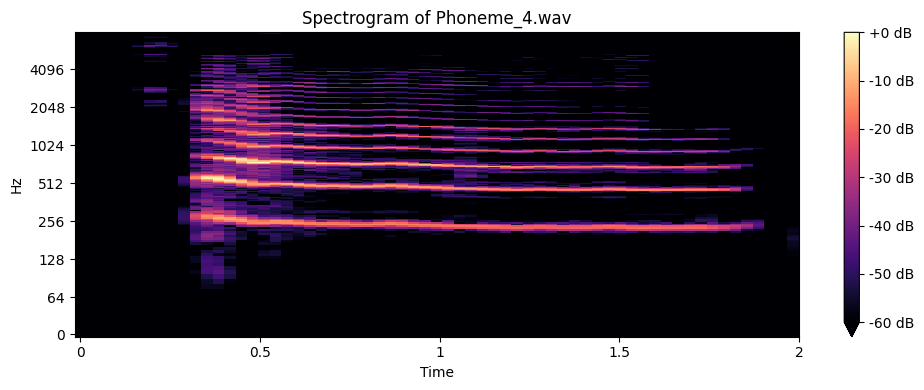

In [14]:
def plot_spectrogram(y, sr, title):
    # Compute spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB', cmap='viridis', extend='min')
    plt.clim(-60, 0)
    plt.title(title)
    plt.tight_layout()
    plt.show()

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    plot_spectrogram(y, sr, f'Spectrogram of {os.path.basename(wav_list[i])}')

**(a) window length of 30 msec, hop length of 15 msec, window shape is hanning.**

Plotting spectrograms with window length: 30 ms, hop length: 15 ms, window type: hann


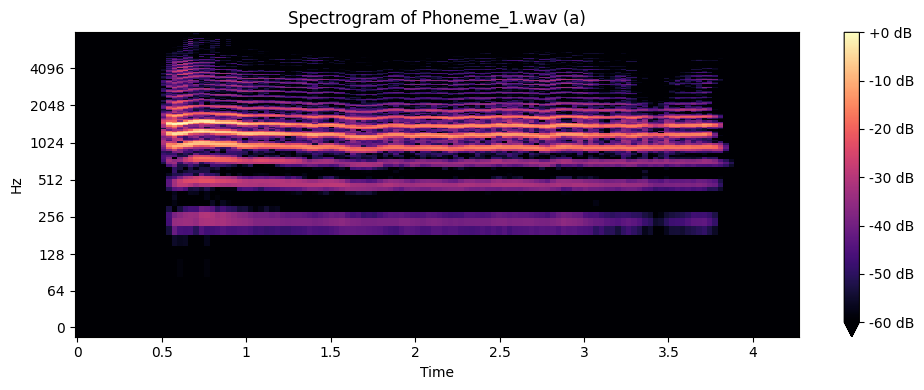

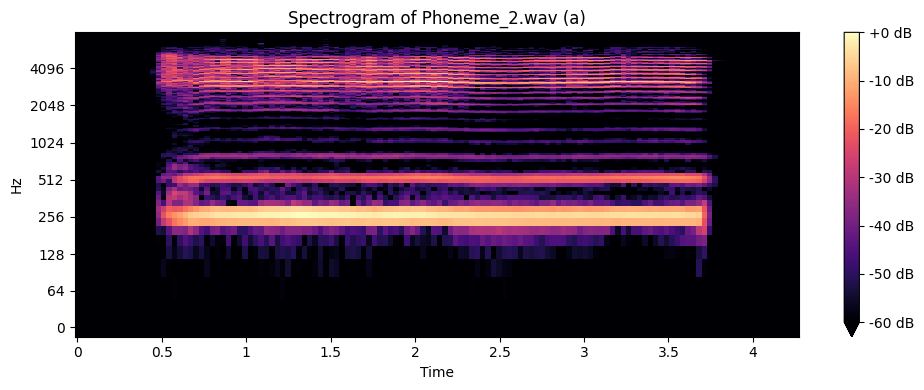

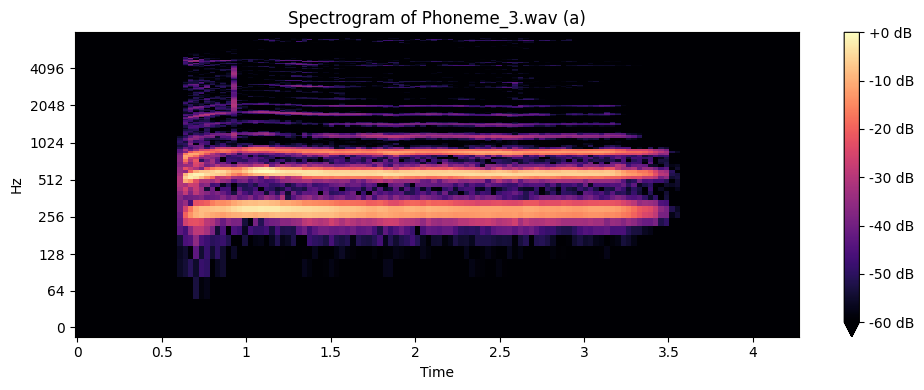

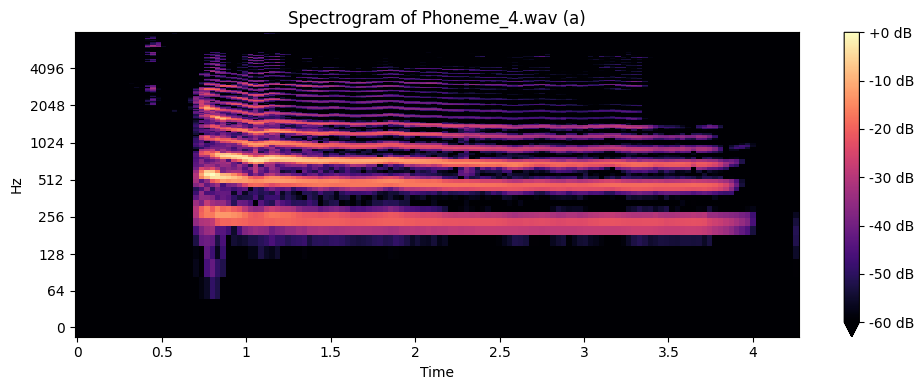

In [15]:
def plot_spectrogram_with_params(y, sr, title, win_length_ms, hop_length_ms, window_type):
    n_fft = int(round(win_length_ms * sr / 1000))
    hop_length = int(round(hop_length_ms * sr / 1000))
    window = signal.get_window(window_type, n_fft)

    # Compute spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window)), ref=np.max)

    # Plot spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB', cmap='viridis', extend='min')
    plt.clim(-60, 0)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Parameters for the first plot
win_length_ms_a = 30
hop_length_ms_a = 15
window_type_a = 'hann'

print(f"Plotting spectrograms with window length: {win_length_ms_a} ms, hop length: {hop_length_ms_a} ms, window type: {window_type_a}")

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    plot_spectrogram_with_params(y, sr, f'Spectrogram of {os.path.basename(wav_list[i])} (a)', win_length_ms_a, hop_length_ms_a, window_type_a)

**(b) window length of 5 msec, hop length of 2.5 msec, window shape is hanning.**

Plotting spectrograms with window length: 5 ms, hop length: 2.5 ms, window type: hann


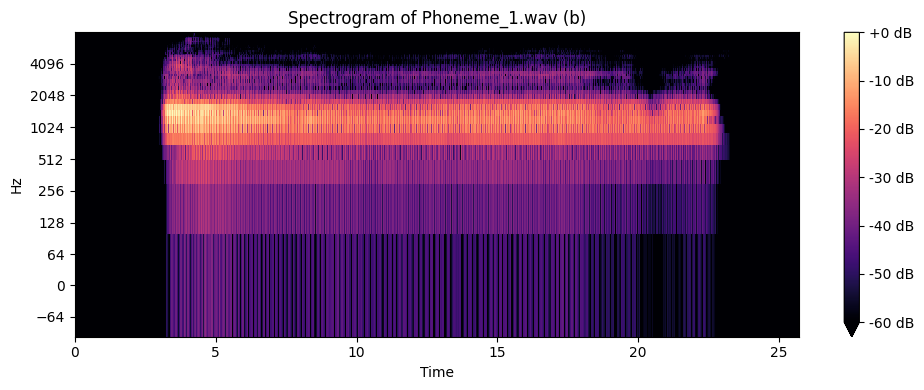

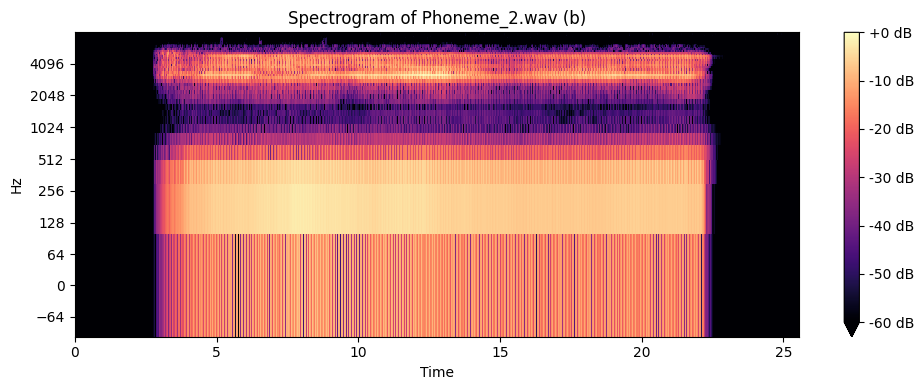

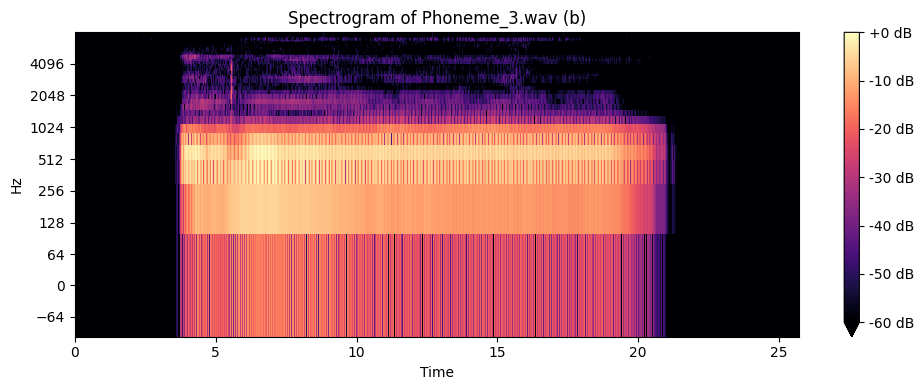

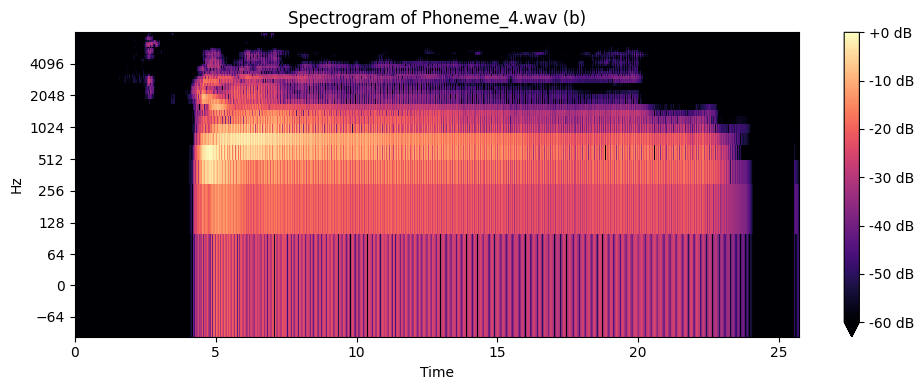

In [16]:
# Parameters for the second plot
win_length_ms_b = 5
hop_length_ms_b = 2.5
window_type_b = 'hann' # 'hanning' is also acceptable for signal.get_window

print(f"Plotting spectrograms with window length: {win_length_ms_b} ms, hop length: {hop_length_ms_b} ms, window type: {window_type_b}")

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    plot_spectrogram_with_params(y, sr, f'Spectrogram of {os.path.basename(wav_list[i])} (b)', win_length_ms_b, hop_length_ms_b, window_type_b)

Convolve each audio signal in the list `audio_signals` three times with itself.


    Args:
        signal: The input audio signal as a NumPy array.
        n_convolutions: The number of times to convolve the signal with itself.

    Returns:
        The convolved signal as a NumPy array.

In [17]:
def convolve_signal(signal, n_convolutions):

    convolved_signal = signal
    for _ in range(n_convolutions):
        convolved_signal = np.convolve(convolved_signal, signal, mode='full')
    return convolved_signal

Iterate and convolve


In [18]:
convolved_audio_data = []

for y in audio_data:
    convolved_y = convolve_signal(y, 3)
    convolved_audio_data.append(convolved_y)

print(f"Convolution complete. Generated {len(convolved_audio_data)} convolved signals.")

Convolution complete. Generated 4 convolved signals.


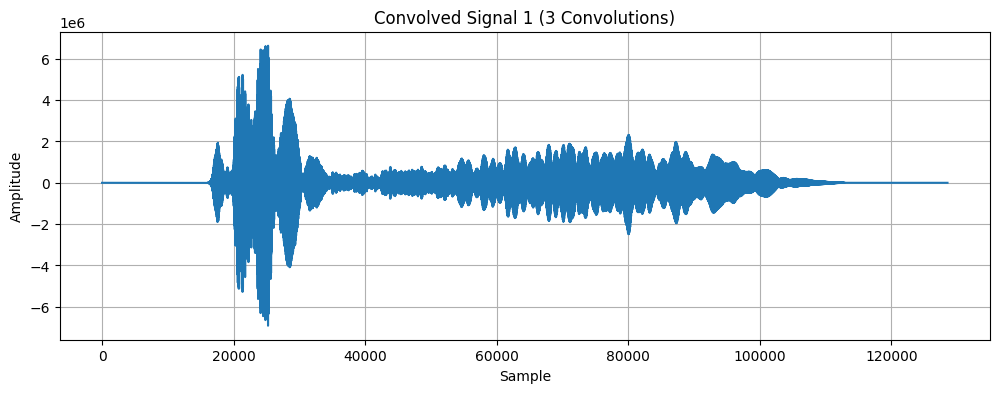

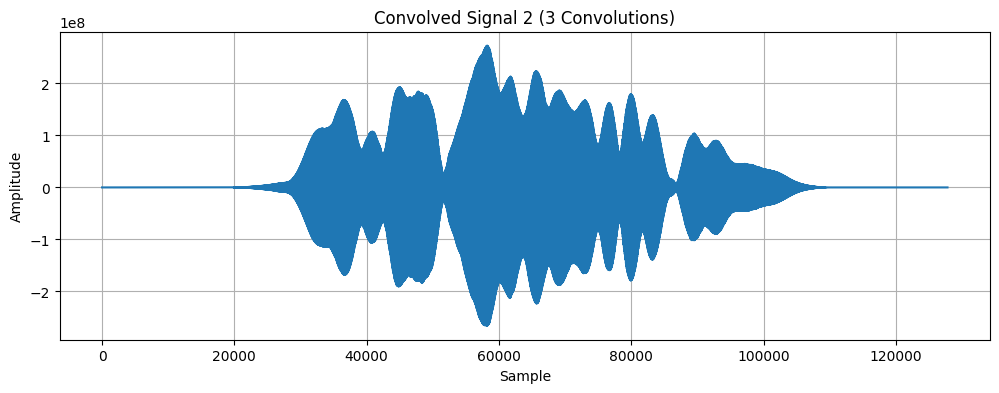

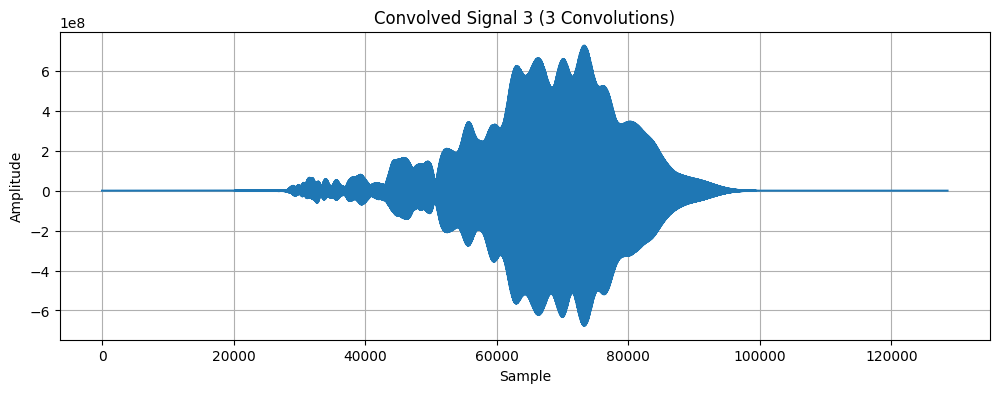

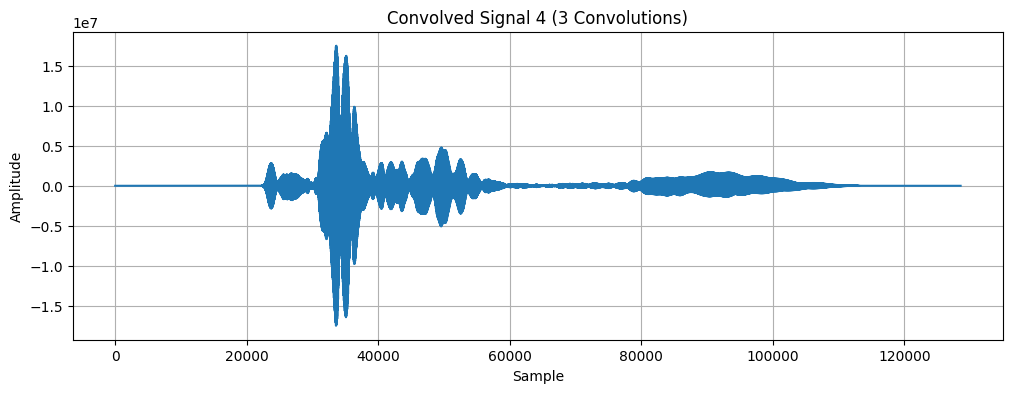

In [19]:
for i, convolved_y in enumerate(convolved_audio_data):
    plt.figure(figsize=(12, 4))
    plt.plot(convolved_y)
    plt.title(f'Convolved Signal {i+1} (3 Convolutions)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

Plotting spectrograms for convolved signals using parameters (a)


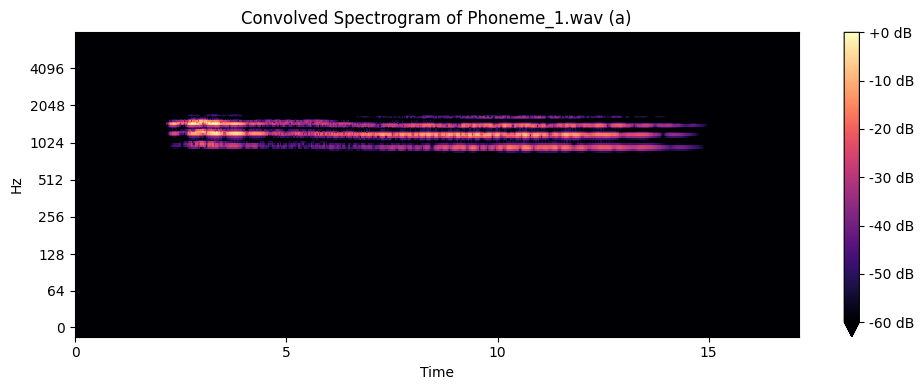

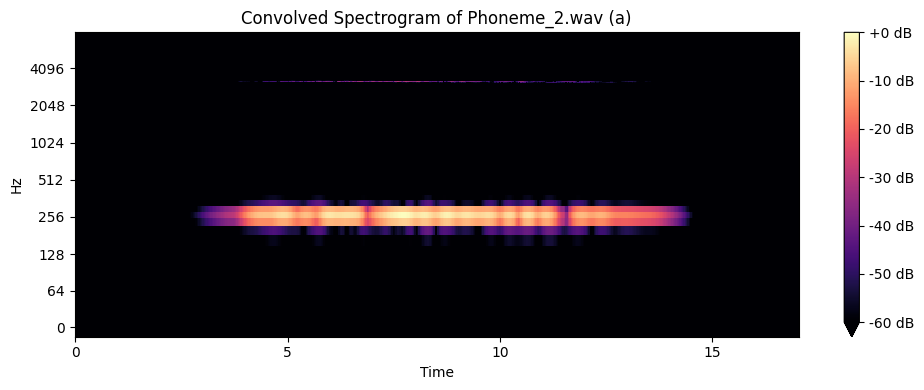

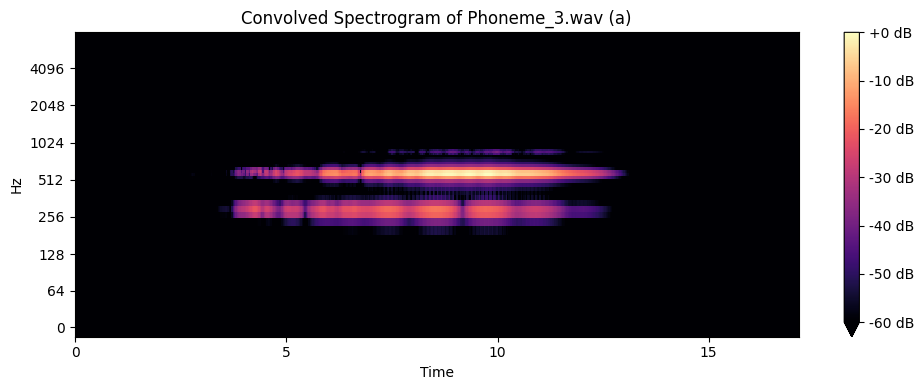

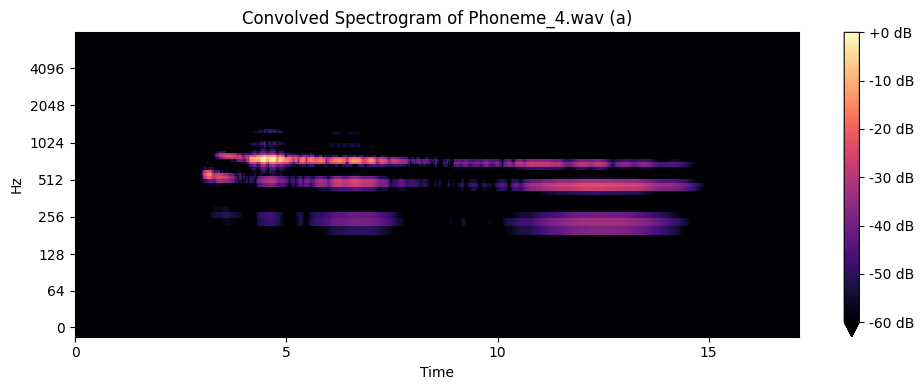

Plotting spectrograms for convolved signals using parameters (b)


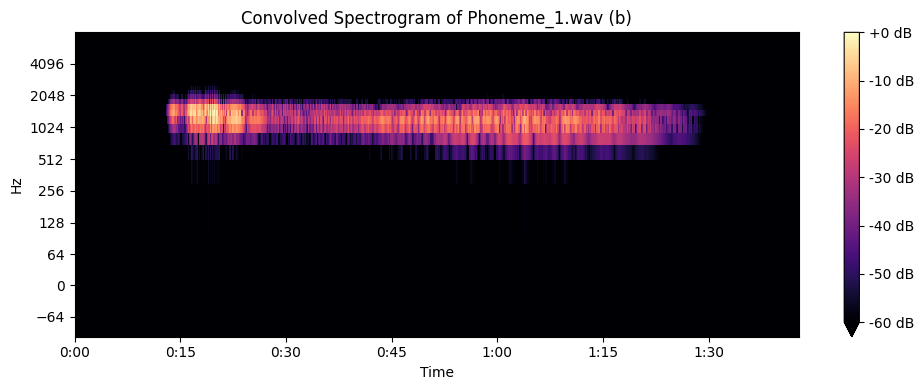

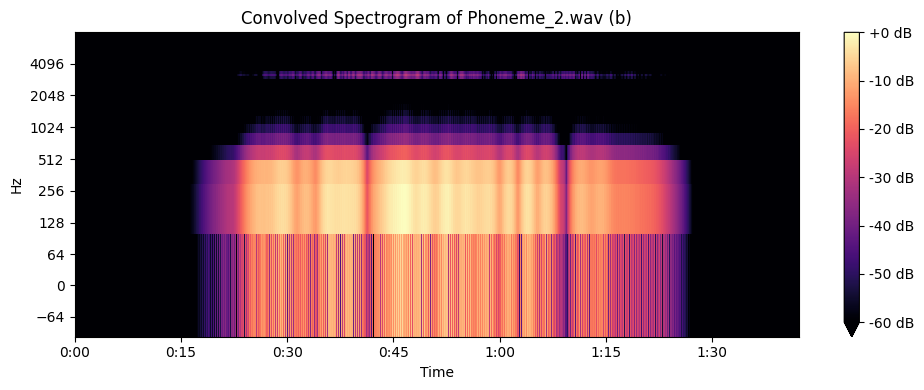

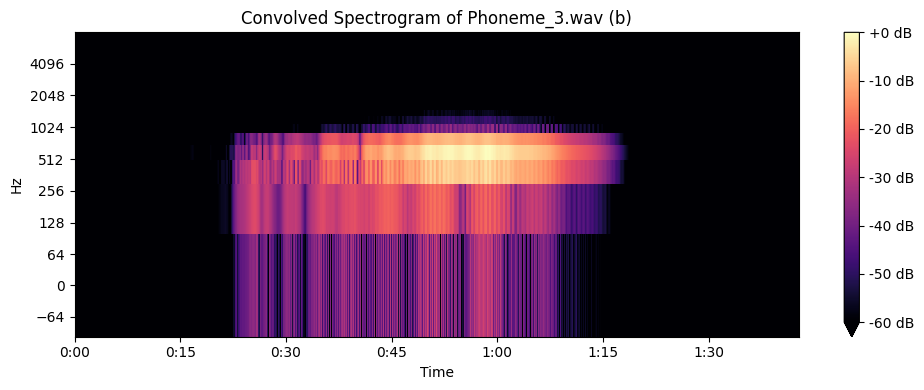

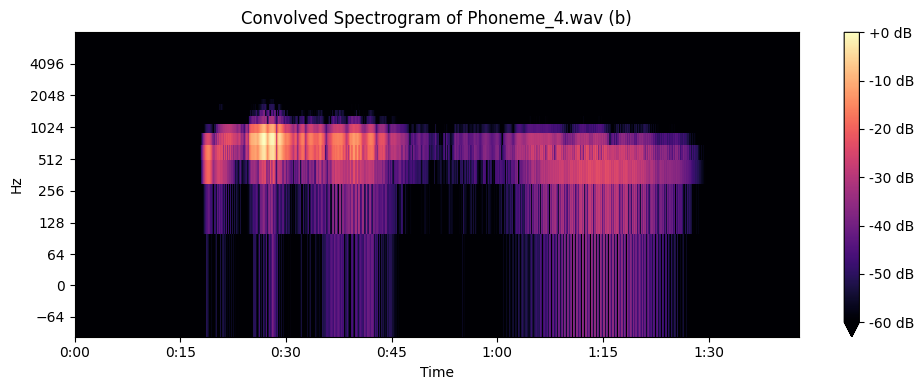

In [20]:
# Plot spectrograms for convolved audio data using parameters from (a)
print("Plotting spectrograms for convolved signals using parameters (a)")
for i, (y, sr) in enumerate(zip(convolved_audio_data, sampling_rates)):
    plot_spectrogram_with_params(y, sr, f'Convolved Spectrogram of {os.path.basename(wav_list[i])} (a)', win_length_ms_a, hop_length_ms_a, window_type_a)

# Plot spectrograms for convolved audio data using parameters from (b)
print("Plotting spectrograms for convolved signals using parameters (b)")
for i, (y, sr) in enumerate(zip(convolved_audio_data, sampling_rates)):
    plot_spectrogram_with_params(y, sr, f'Convolved Spectrogram of {os.path.basename(wav_list[i])} (b)', win_length_ms_b, hop_length_ms_b, window_type_b)

## Observations on Convolved Signals

After convolving each audio signal three times with itself, several observations can be made from the time-domain plots and the spectrograms:

*   **Increased Duration:** The convolved signals are significantly longer in duration compared to the original signals. This is expected with convolution, as the output length is the sum of the input lengths minus one for each convolution. With three convolutions, the length increases substantially.
*   **Amplitude Changes:** The amplitude of the convolved signals has increased significantly. This is also a typical result of convolution, especially when convolving a signal with itself multiple times, as the energy accumulates.
*   **Smoothing Effect:** The time-domain plots of the convolved signals appear smoother than the original signals. Convolution with a signal effectively acts as a form of filtering, which can lead to a smoothing effect.
*   **Changes in Spectrogram:** The spectrograms of the convolved signals show broader frequency content and less distinct features compared to the original signals. This is likely due to the spreading of the signal's energy across a wider time and frequency range as a result of repeated convolution.
*   **Impact of Spectrogram Parameters:** The differences between the spectrograms generated with parameters (a) and (b) are still evident for the convolved signals. Parameter set (b) (shorter window, shorter hop) still provides better time resolution, while parameter set (a) (longer window, longer hop) provides better frequency resolution. However, the overall smearing effect from convolution is present in both.

In [21]:
# Save convolved audio data to files
output_dir = './convolved_audio'
os.makedirs(output_dir, exist_ok=True)

for i, convolved_y in enumerate(convolved_audio_data):
    output_filename = os.path.join(output_dir, f'Convolved_{os.path.basename(wav_list[i])}')
    # Need to scale the convolved signal back to a reasonable range for saving as WAV
    # A simple approach is to scale by the maximum absolute value of the original signal
    # Or you can scale by the maximum absolute value of the convolved signal itself
    scaled_convolved_y = convolved_y / np.max(np.abs(convolved_y))
    sf.write(output_filename, scaled_convolved_y, sampling_rates[i])
    print(f"Saved convolved signal to {output_filename}")

print("Finished saving convolved audio files.")

Saved convolved signal to ./convolved_audio/Convolved_Phoneme_1.wav
Saved convolved signal to ./convolved_audio/Convolved_Phoneme_2.wav
Saved convolved signal to ./convolved_audio/Convolved_Phoneme_3.wav
Saved convolved signal to ./convolved_audio/Convolved_Phoneme_4.wav
Finished saving convolved audio files.
